<a href="https://colab.research.google.com/github/AngieDuran953/Analisis-de-admisiones/blob/main/an%C3%A1lisis_de_admisiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import plotly
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.colors as colors

In [ ]:
# Cargar el archivo de Excel
df_20191 = pd.read_excel('informe_nuevos_ICFES_Escolaris_1.xlsx', sheet_name='2019-1 escolaris_inscritos')
df_20192 = pd.read_excel('informe_nuevos_ICFES_Escolaris_1.xlsx', sheet_name='2019-2 escolaris_inscritos')
df_20201 = pd.read_excel('informe_nuevos_ICFES_Escolaris_1.xlsx', sheet_name='2020-1 escolaris_inscritos')
df_20202 = pd.read_excel('informe_nuevos_ICFES_Escolaris_1.xlsx', sheet_name='2020-2 escolaris_inscritos')


df_20211 = pd.read_excel('Historico consolidados_Enlace.xlsx', sheet_name='2021-1')
df_20212 = pd.read_excel('Historico consolidados_Enlace.xlsx', sheet_name='2021-2')
df_20221 = pd.read_excel('Historico consolidados_Enlace.xlsx', sheet_name='2022-1')
df_20222 = pd.read_excel('Historico consolidados_Enlace.xlsx', sheet_name='2022-2')


In [19]:
file_sheet_mapping = {
    'informe_nuevos_ICFES_Escolaris_1.xlsx': ['2019-1 escolaris_inscritos', '2019-2 escolaris_inscritos', '2020-1 escolaris_inscritos', '2020-2 escolaris_inscritos'],
    'Historico consolidados_Enlace.xlsx': ['2021-1', '2021-2', '2022-1', '2022-2']
}

dfs = {}

for file_name, sheet_names in file_sheet_mapping.items():
    for sheet_name in sheet_names:
        df = pd.read_excel(file_name, sheet_name=sheet_name)
        dfs[f"{file_name}_{sheet_name}"] = df

#dfs['Historico consolidados_Enlace.xlsx_2022-2']

In [ ]:
def programas(df):

  # Seleccionar las columnas de interés
  columnas_puntajes = ["Puntaje PMA", "Puntaje PCN", "Puntaje PLC", "Puntaje PSC", "Puntaje PIN"]
  columna_programa_academico = "Programa Académico"

  # Crear una lista vacía para almacenar los datos de cada programa académico
  datos_programas = []

  # Iterar sobre los programas académicos únicos y comparar los puntajes
  for programa in df[columna_programa_academico].unique():
      puntajes = df.loc[df[columna_programa_academico] == programa, columnas_puntajes].mean()
      datos_programas.append(go.Bar(name=programa, x=columnas_puntajes, y=puntajes))

  # Configurar el diseño del gráfico
  layout = go.Layout(
      title="Comparación de Puntajes por Programa Académico",
      xaxis=dict(title="Áreas de Puntaje"),
      yaxis=dict(title="Puntaje Promedio"),
      barmode='group'
  )

  # Crear la figura del gráfico
  fig = go.Figure(data=datos_programas, layout=layout)

  # Mostrar el gráfico
  fig.show()


def programas2(df):

    # Seleccionar las columnas de interés
    columnas_puntajes = ['ar_mat', 'ar_len', 'ar_cie']
    nombres_puntajes = ['Matemáticas', 'Lenguaje', 'Ciencias']
    columna_programa_academico = "nom_dpto"

    # Crear una lista vacía para almacenar los datos de cada programa académico
    datos_programas = []

    # Iterar sobre los programas académicos únicos y comparar los puntajes
    for programa in df[columna_programa_academico].unique():
        puntajes = df.loc[df[columna_programa_academico] == programa, columnas_puntajes].mean()
        datos_programas.append(go.Bar(name=programa, x=nombres_puntajes, y=puntajes))

    # Configurar el diseño del gráfico
    layout = go.Layout(
        title="Comparación de Puntajes por Programa Académico",
        xaxis=dict(title="Áreas de Puntaje"),
        yaxis=dict(title="Puntaje Promedio"),
        barmode='group'
    )

    # Crear la figura del gráfico
    fig = go.Figure(data=datos_programas, layout=layout)

    # Mostrar el gráfico
    fig.show()


In [ ]:
import plotly.graph_objects as go
import plotly.subplots as sp

def demografico(dfs):
    fig = go.Figure()

    for key, df in dfs.items():
        # Extract relevant demographic columns
        columnas_demograficas = ['Sexo', 'Estrato Social', 'Edad', 'País', 'Departamento', 'Ciudad']
        datos_demograficos = df[columnas_demograficas]

        # Calculate demographic distribution for top 10 departamentos de origen
        distribucion_departamento = datos_demograficos['Departamento'].value_counts().head(10)

        # Add trace to the figure
        fig.add_trace(go.Bar(x=distribucion_departamento.index, y=distribucion_departamento.values,
                             name=key, visible=True))

    # Update layout with dropdown menu
    fig.update_layout(
        updatemenus=[
            dict(
                buttons=list([
                    dict(
                        label="Todos los periodos",
                        method="update",
                        args=[{"visible": [True] * len(dfs)}],
                    )
                ]) +
                list([
                    dict(
                        label=key,
                        method="update",
                        args=[{"visible": [True if key == k else False for k in dfs.keys()]}],
                    )
                    for key in dfs.keys()
                ]),
                active=0,  # Set the initially selected period here (0 for the first period)
                showactive=True,
            )
        ]
    )

    # Set layout and labels
    fig.update_layout(title="Top 10 departamentos de origen",
                      xaxis=dict(title="Departamento"),
                      yaxis=dict(title="Cantidad de estudiantes"))

    fig.show()


# Usage example with your provided dataframes
dfs = {
    '2022-2': dfs['Historico consolidados_Enlace.xlsx_2022-2'],
    '2022-1': dfs['Historico consolidados_Enlace.xlsx_2022-1'],
    '2021-2': dfs['Historico consolidados_Enlace.xlsx_2021-2'],
    '2021-1': dfs['Historico consolidados_Enlace.xlsx_2021-1']
}

demografico(dfs)



In [20]:
import plotly.graph_objects as go
import plotly.subplots as sp

def demografico(dfs):
    fig = go.Figure()

    period_order = ['2021-1', '2021-2', '2022-1', '2022-2']

    for period in period_order:
        if period in dfs:
            df = dfs[period]

            # Extract relevant demographic columns
            columnas_demograficas = ['Sexo', 'Estrato Social', 'Edad', 'País', 'Departamento', 'Ciudad']
            datos_demograficos = df[columnas_demograficas]

            # Calculate demographic distribution for top 10 departamentos de origen
            distribucion_departamento = datos_demograficos['Departamento'].value_counts().head(10)

            # Add trace to the figure
            fig.add_trace(go.Bar(x=distribucion_departamento.index, y=distribucion_departamento.values,
                                 name=period, visible=True))

    # Set layout and labels
    fig.update_layout(title="Top 10 departamentos de origen",
                      xaxis=dict(title="Departamento"),
                      yaxis=dict(title="Cantidad de estudiantes"))

    fig.show()


# Usage example with your provided dataframes
dfs = {
    '2022-2': dfs['Historico consolidados_Enlace.xlsx_2022-2'],
    '2022-1': dfs['Historico consolidados_Enlace.xlsx_2022-1'],
    '2021-2': dfs['Historico consolidados_Enlace.xlsx_2021-2'],
    '2021-1': dfs['Historico consolidados_Enlace.xlsx_2021-1']
}

demografico(dfs)


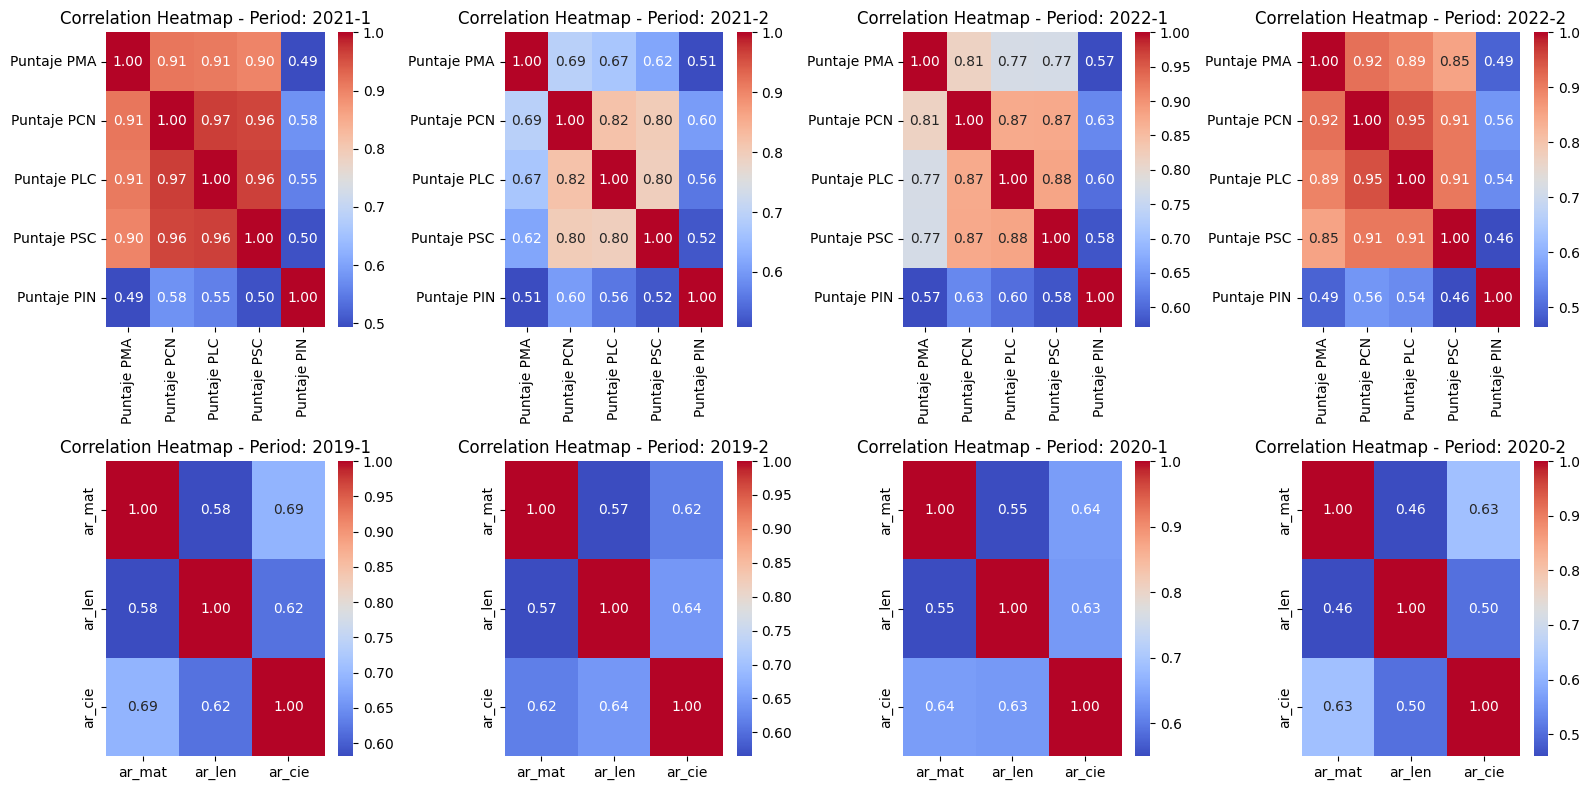

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def correlacion(dfs):
    fig, axs = plt.subplots(2, 4, figsize=(16, 8))
    periods = list(dfs.keys())

    for i, period in enumerate(periods):
        df = dfs[period]

        if i < 4:
            puntajes_columns = ['Puntaje PMA', 'Puntaje PCN', 'Puntaje PLC', 'Puntaje PSC', 'Puntaje PIN']
            title = f"Correlation Heatmap - Period: {period}"
        else:
            puntajes_columns = ['ar_mat', 'ar_len', 'ar_cie']
            title = f"Correlation Heatmap - Period: {period}"

        puntajes_data = df[puntajes_columns]
        correlation_matrix = puntajes_data.corr()

        ax = axs[i // 4, i % 4]
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=ax)
        ax.set_ylim(len(correlation_matrix), 0)
        ax.set_xlim(0, len(correlation_matrix))
        ax.set_title(title)

    plt.tight_layout()
    plt.show()


# Read data for the first four periods
file_sheet_mapping_1 = {
    'Historico consolidados_Enlace.xlsx': ['2021-1', '2021-2', '2022-1', '2022-2']
}

dfs_1 = {}

for file_name, sheet_names in file_sheet_mapping_1.items():
    for sheet_name in sheet_names:
        df = pd.read_excel(file_name, sheet_name=sheet_name)
        period = sheet_name.split()[0]
        dfs_1[period] = df


# Read data for the other four periods
file_sheet_mapping_2 = {
    'informe_nuevos_ICFES_Escolaris_1.xlsx': ['2019-1 escolaris_inscritos', '2019-2 escolaris_inscritos',
                                             '2020-1 escolaris_inscritos', '2020-2 escolaris_inscritos']
}

dfs_2 = {}

for file_name, sheet_names in file_sheet_mapping_2.items():
    for sheet_name in sheet_names:
        df = pd.read_excel(file_name, sheet_name=sheet_name)
        period = sheet_name.split()[0]
        dfs_2[period] = df


# Combine the dataframes
dfs = {**dfs_1, **dfs_2}

# Generate the correlation graphs
correlacion(dfs)


In [17]:
import pandas as pd
import plotly.graph_objects as go

file_sheet_mapping = {
    'Historico consolidados_Enlace.xlsx': ['2021-1', '2021-2', '2022-1', '2022-2']
}

dfs = {}

# Read the data for the specified periods and store them in a dictionary
for file_name, sheet_names in file_sheet_mapping.items():
    for sheet_name in sheet_names:
        df = pd.read_excel(file_name, sheet_name=sheet_name)
        dfs[sheet_name] = df

# Create a grouped DataFrame with Period, Estrato Social, and the count of students
grouped_df = pd.DataFrame(columns=['Period', 'Estrato Social', 'Students'])

for period, df in dfs.items():
    # Group by Estrato Social and count the number of students
    counts = df['Estrato Social'].value_counts().sort_index()

    # Append the data to the grouped DataFrame
    grouped_df = grouped_df.append(pd.DataFrame({'Period': [period] * len(counts),
                                                 'Estrato Social': counts.index,
                                                 'Students': counts.values}),
                                   ignore_index=True)

# Sort the grouped DataFrame by Period and Students in descending order
grouped_df = grouped_df.sort_values(by=['Period', 'Students'], ascending=[True, False])

# Create the plotly graph
fig = go.Figure()

# Iterate over each Estrato Social
for estrato in grouped_df['Estrato Social'].unique():
    # Filter the data for the current Estrato Social
    data = grouped_df[grouped_df['Estrato Social'] == estrato]

    # Add a bar trace for the current Estrato Social
    fig.add_trace(go.Bar(x=data['Period'], y=data['Students'], name=estrato))

# Update the layout
fig.update_layout(
    title="Distribución del Estrato Social por Periodo",
    xaxis=dict(title="Periodo", type='category'),
    yaxis=dict(title="Cantidad de estudiantes"),
    barmode='group',
    showlegend=True
)

# Show the plotly graph
fig.show()



<ipython-input-17-ae8dbfa611af>:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-17-ae8dbfa611af>:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-17-ae8dbfa611af>:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-17-ae8dbfa611af>:24: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [51]:
import pandas as pd
import plotly.express as px

file_sheet_mapping = {
    'Historico consolidados_Enlace.xlsx': ['2021-1', '2021-2', '2022-1', '2022-2']
}

dfs = {}

for file_name, sheet_names in file_sheet_mapping.items():
    for sheet_name in sheet_names:
        df = pd.read_excel(file_name, sheet_name=sheet_name)
        dfs[sheet_name] = df

def demografico(dfs):
    # Concatenate all dataframes into a single dataframe
    combined_df = pd.concat(dfs.values())

    # Filter out cities with 5 students or less
    filtered_df = combined_df.groupby(['Estrato Social', 'Departamento']).filter(lambda x: len(x) > 5)

    # Calculate the number of students per Departamento and Estrato Social
    grouped_df = filtered_df.groupby(['Estrato Social', 'Departamento']).size().reset_index(name='Cantidad de estudiantes')

    # Create a plotly bar graph
    fig = px.bar(grouped_df, x='Estrato Social', y='Cantidad de estudiantes', color='Departamento')

    # Set layout and labels
    fig.update_layout(title="Distribución de Estudiantes por Estrato Social y Departamento",
                      xaxis=dict(title="Estrato Social"),
                      yaxis=dict(title="Cantidad de estudiantes"))

    fig.show()


demografico(dfs)



In [61]:
import pandas as pd
import plotly.express as px

file_sheet_mapping = {
    'Historico consolidados_Enlace.xlsx': ['2021-1', '2021-2', '2022-1', '2022-2']
}

dfs = {}

for file_name, sheet_names in file_sheet_mapping.items():
    for sheet_name in sheet_names:
        df = pd.read_excel(file_name, sheet_name=sheet_name)
        dfs[sheet_name] = df

# Combine all dataframes into a single dataframe
combined_df = pd.concat(dfs.values())

# Group the data by 'Estrato Social' and calculate the average of the scores
grouped_df = combined_df.groupby('Estrato Social', as_index=False).mean()

# Reshape the data to a tidy format
tidy_df = pd.melt(grouped_df, id_vars='Estrato Social', value_vars=["Puntaje PMA", "Puntaje PCN", "Puntaje PLC", "Puntaje PSC", "Puntaje PIN"],
                  var_name='Puntaje', value_name='Average Score')

# Create a grouped bar chart using Plotly Express
fig = px.bar(tidy_df, x='Estrato Social', y='Average Score', color='Puntaje',
             title='Average Scores by Estrato Social',
             labels={'Estrato Social': 'Estrato Social', 'Average Score': 'Average Score', 'Puntaje': 'Puntaje'})

fig.show()



<ipython-input-61-ae0fc18350fe>:19: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [19]:
import pandas as pd
import plotly.graph_objects as go

file_sheet_mapping = {
    'informe_nuevos_ICFES_Escolaris_1.xlsx': ['2019-1 escolaris_inscritos', '2019-2 escolaris_inscritos', '2020-1 escolaris_inscritos', '2020-2 escolaris_inscritos'],
    'Historico consolidados_Enlace.xlsx': ['2021-1', '2021-2', '2022-1', '2022-2']
}

dfs = {}

for file_name, sheet_names in file_sheet_mapping.items():
    for sheet_name in sheet_names:
        df = pd.read_excel(file_name, sheet_name=sheet_name)
        dfs[f"{file_name}_{sheet_name}"] = df

# Combine all DataFrames into a single DataFrame
df_combined = pd.concat(dfs.values())

# Define the column names and titles for the set of graphs
columnas_puntajes = ['ar_mat', 'ar_len', 'ar_cie']
columna_programa_academico = 'nom_dpto'

# Calculate average scores per Programa Académico
average_scores = df_combined.groupby(columna_programa_academico)[columnas_puntajes].mean()

# Create the bar graph
fig = go.Figure(data=[
    go.Bar(name=columna, x=average_scores.index, y=average_scores[columna])
    for columna in columnas_puntajes
])

# Update layout and labels
fig.update_layout(
    title="Promedio de Puntajes por Programa Académico",
    xaxis=dict(title="Programa Académico"),
    yaxis=dict(title="Puntaje Promedio"),
    barmode='group'
)

fig.show()



In [20]:
import pandas as pd
import plotly.express as px

file_sheet_mapping = {
    'informe_nuevos_ICFES_Escolaris_1.xlsx': ['2019-1 escolaris_inscritos', '2019-2 escolaris_inscritos', '2020-1 escolaris_inscritos', '2020-2 escolaris_inscritos'],
    'Historico consolidados_Enlace.xlsx': ['2021-1', '2021-2', '2022-1', '2022-2']
}

dfs = {}

for file_name, sheet_names in file_sheet_mapping.items():
    for sheet_name in sheet_names:
        df = pd.read_excel(file_name, sheet_name=sheet_name)
        dfs[sheet_name] = df

# Combine all DataFrames into a single DataFrame
df_combined = pd.concat(dfs.values())

# Extract the desired columns
column_mapping = {
    'ar_mat': 'Puntaje PMA',
    'ar_len': 'Puntaje PLC',
    'ar_cie': 'Puntaje PCN',
    'nom_dpto': 'Programa Académico'
}
df_combined = df_combined[list(column_mapping.keys())].rename(columns=column_mapping)

# Calculate average scores per Programa Académico
average_scores = df_combined.groupby('Programa Académico').mean()

# Sort the DataFrame by the average scores
average_scores = average_scores.sort_values(by=['Puntaje PMA', 'Puntaje PLC', 'Puntaje PCN'], ascending=False)

# Plotting the bar graph
fig = px.bar(average_scores, x=average_scores.index, y=['Puntaje PMA', 'Puntaje PLC', 'Puntaje PCN'])
fig.update_layout(title="Promedio de Puntajes por Programa Académico",
                  xaxis=dict(title="Programa Académico"),
                  yaxis=dict(title="Promedio del Puntaje"))

fig.show()


In [49]:
import pandas as pd
import plotly.graph_objects as go
import plotly.subplots as sp
import plotly.io as pio
import numpy as np

file_sheet_mapping = {
    'informe_nuevos_ICFES_Escolaris_1.xlsx': ['2019-1 escolaris_inscritos', '2019-2 escolaris_inscritos', '2020-1 escolaris_inscritos', '2020-2 escolaris_inscritos'],
    'Historico consolidados_Enlace.xlsx': ['2021-1', '2021-2', '2022-1', '2022-2']
}

dfs = {}

for file_name, sheet_names in file_sheet_mapping.items():
    for sheet_name in sheet_names:
        df = pd.read_excel(file_name, sheet_name=sheet_name)
        dfs[sheet_name] = df

# Combine data from all periods
df_combined = pd.concat(dfs.values())

# Define the columns of interest
programa_columns = ['nom_dpto']
puntajes_columns = ['ar_mat', 'ar_len', 'ar_cie']

# Calculate average scores per Programa Académico
average_scores = df_combined.groupby(programa_columns)[puntajes_columns].mean()

# Sort by average scores in descending order
average_scores = average_scores.sort_values(by=puntajes_columns, ascending=False)

# Extract the program names and average scores
programas = average_scores.index
scores = average_scores.values

# Create a horizontal bar chart
fig = go.Figure()
fig.add_trace(go.Bar(
    y=programas,
    x=scores[:, 0],
    name='Puntaje PMA',
    orientation='h',
    marker=dict(color='skyblue')
))
fig.add_trace(go.Bar(
    y=programas,
    x=scores[:, 1],
    name='Puntaje PLC',
    orientation='h',
    marker=dict(color='lightgreen')
))
fig.add_trace(go.Bar(
    y=programas,
    x=scores[:, 2],
    name='Puntaje PCN',
    orientation='h',
    marker=dict(color='lightpink')
))

# Update layout and labels
fig.update_layout(
    title='Promedio de Puntajes por Programa Académico',
    xaxis=dict(title='Puntaje Promedio'),
    yaxis=dict(title='Programa Académico'),
    barmode='stack',
    height=800,
    width=1000
)

# Show the plot
fig.show()


In [77]:
import pandas as pd

file_sheet_mapping = {
    'informe_nuevos_ICFES_Escolaris_1.xlsx': ['2019-1 escolaris_inscritos', '2019-2 escolaris_inscritos', '2020-1 escolaris_inscritos', '2020-2 escolaris_inscritos'],
    'Historico consolidados_Enlace.xlsx': ['2021-1', '2021-2', '2022-1', '2022-2']
}

dfs = {}

for file_name, sheet_names in file_sheet_mapping.items():
    for sheet_name in sheet_names:
        df = pd.read_excel(file_name, sheet_name=sheet_name)
        # Extract the period from the sheet name
        period = sheet_name.split()[0]
        # Add the 'Period' column to the dataframe
        df['Period'] = period
        dfs[f"{file_name}_{sheet_name}"] = df

# Rename columns in the Escolaris file
dfs['informe_nuevos_ICFES_Escolaris_1.xlsx_2019-1 escolaris_inscritos'].rename(columns={'ar_mat': 'Puntaje PMA',
                                                                                         'ar_len': 'Puntaje PLC',
                                                                                         'ar_cie': 'Puntaje PCN',
                                                                                         'nom_dpto': 'Programa Académico'}, inplace=True)

# Concatenate dataframes into a single dataframe
df_combined = pd.concat(dfs.values())

# Group by Period and Programa Académico and calculate average
df_grouped = df_combined.groupby(['Period', 'Programa Académico']).mean()[['Puntaje PMA', 'Puntaje PLC', 'Puntaje PCN']]


<ipython-input-77-92d8363471e7>:29: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [106]:
df_grouped.to_csv('df_grouped.csv')

In [98]:
import pandas as pd

df_grouped = pd.read_csv('df_grouped.csv')

df_grouped


,Period,Programa Académico,Puntaje PMA,Puntaje PLC,Puntaje PCN
0,2019-1,ADMINISTRACION DE EMPRESAS,64.647059,65.470588,60.529412
1,2019-1,ECONOMIA,68.062500,68.000000,65.750000
2,2019-1,INGENIERIA DE SISTEMAS,67.340659,64.868132,64.549451
3,2019-1,INGENIERIA ELECTRICA,66.650000,62.950000,65.500000
4,2019-1,INGENIERIA ELECTRONICA,68.448276,65.258621,66.137931
5,2019-1,INGENIERIA INDUSTRIAL,66.078947,62.724138,62.267241
6,2019-1,INGENIERIA MECANICA,68.353535,63.161616,64.484848
7,2019-1,INGENIERÍA AMBIENTAL,61.866667,61.833333,62.466667
8,2019-1,INGENIERÍA BIOMÉDICA,72.741176,68.835294,70.423529
9,2019-1,INGENIERÍA CIVIL,66.994898,63.253807,63.527919
